<a href="https://colab.research.google.com/github/AdamNur422/ITCS-5156/blob/main/12_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequences


### ITCS 5156
### Minwoo "Jake" Lee

<br/>
<font color="blue"><b>

NAME: Adam Nur 

</b> </font>

# Goal

The goal of this lab is to make you get familiar with different type of machine learning tasks like analysing Time Series Data and Sentimental Analysis. We will be using the IBM Stock Price Dataset and IMDB Movie Review Dataset to implement machine learning architectures like RNN and LSTM to achieve these taks. Follow the TODO titles and comments to finish the activity!

# Agenda

For each of the two datasets, we will be doing the following steps in order.

* Loading the dataset
* Data Preprocessing
* LSTM Model Creation
* Training and Testing
* Inference

# Tables of TODO's


1. [TODO1 (2 points)](#TODO1)
2. [TODO2 (8 points)](#TODO2)
3. [TODO3 (10 points)](#TODO3)
4. [TODO4 (10 points)](#TODO4)  
5. [TODO5 (10 points)](#TODO5)
6. [TODO6 (5 points)](#TODO6)
7. [TODO7 (5 points)](#TODO7)
8. [TODO8 (3 points)](#TODO8)
9. [TODO9 (6 points)](#TODO9)
10. [TODO10 (6 points)](#TODO10)
11. [TODO11 (10 points)](#TODO11)
12. [TODO12 (10 points)](#TODO11)
13. [TODO13 (5 points)](#TODO11)
14. [TODO14 (7 points)](#TODO11)

12. [Feedback (3 points)](#Feedback)


Well, let us start the lab with importing the common libraries first.

In [ ]:
import os
import numpy as np
import random
import pandas as pd
from pylab import mpl, plt
%matplotlib inline

import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import string
import collections
import torch
import torch.nn as nn
from torch.autograd import Variable

# Sentimental Analysis

We will be considering IMDB Movie Reviews Dataset for performing machine learning tasks on Sentimental Analysis Data. This dataset consists of movie reviews and each review is assignned a sentiment of either positive or negative. Follow the TODOs to get more idea of the dataset.

## Reading the data

### TODO 1 (2 points)

Load the IMDB Movie Reviews Dataset  using `read_csv` function. Store the dataframe in `df` and print it.

In [ ]:
# TODO 1
file_path = '/content/IMDB Dataset.csv'
df = pd.read_csv(file_path)

## Data Preprocessing

To preprocess this movie review dataset, we perform the list of steps given below:

  1. Converting all the reviews to lowercase alphabets.
  2. Remove all the punctuation marks.
  3. Implement tokenization on all the reviews.
  4. Encoding the list of words in reviews to integers.
  5. Encoding the labels positive and negative to 0 and 1 respectively.
  6. Implementing padding on all the encoded reviews to ensure all the reviews are of the same length.

#### Conversion to Lower Case

The first step that we are following in preprocessing is conversion of all the reviews to lower case alphabets. We perform this by using lower() function.

In [ ]:
# Lower Case
df['review'] = df['review'].apply(lambda x:x.lower())
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

#### Removal of Punctuations

We will be using the punctuations in strings library to remove all the punctuation characters. In this step, we create a new column named `clean_text` and store the reviews with all punctuation marks removed. A new column named `len_review`is created to store the length of reviews.

In [ ]:
# Remove Punctuation
from string import punctuation

df['clean_text'] = df['review'].apply(lambda x:''.join([c for c in x if c not in punctuation]))
df['clean_text'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [ ]:
df['len_review'] = df['clean_text'].apply(lambda x:len(x))
df.head()

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261


#### Tokenization

In this step, we first convert the column `clean_text` to a list, concatenate them to create a list of words, and sort them based on their frequnecy.

In [ ]:
# Tokenization

from collections import Counter

all_text2 = df['clean_text'].tolist()
all_text2 = ' '.join(all_text2)

# create a list of words
words = all_text2.split()

# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

print(sorted_words[0:10])

[('the', 663815), ('and', 320663), ('a', 320517), ('of', 288382), ('to', 266773), ('is', 210161), ('in', 184861), ('it', 152899), ('i', 152092), ('this', 149405)]


#### Encoding the words

We now get the index of each word using enumerate function and encode each word in each review with its corresponding index.

In [ ]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
reviews_split = df['clean_text'].tolist()

# Encoding the words
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[28, 4, 1, 77, 1941, 44, 1063, 11, 100, 145, 40, 479, 3324, 393, 461, 26, 3190, 34, 23, 205, 14, 10, 6, 601, 48, 590, 15, 2137, 12, 1, 87, 146, 11, 3255, 69, 42, 3324, 13, 29, 5600, 2, 15378, 134, 4, 582, 61, 282, 7, 205, 35, 1, 670, 138, 1707, 69, 10, 6, 21, 3, 118, 16, 1, 8330, 5794, 39, 11861, 10, 118, 2508, 55, 6064, 15, 5636, 5, 1470, 381, 39, 582, 29, 6, 3407, 7, 1, 352, 340, 4, 1, 23503, 12, 8, 6, 469, 3324, 14, 11, 6, 1, 11516, 338, 5, 1, 16023, 6870, 2543, 1061, 61649, 8, 2637, 1375, 20, 25365, 536, 33, 4727, 2520, 4, 1, 1208, 112, 31, 1, 7153, 25, 2992, 13015, 2, 408, 61650, 37, 17529, 6, 21, 319, 20, 1, 5098, 3720, 536, 6, 344, 5, 81744, 8470, 41120, 15379, 5171, 7893, 2461, 2, 18404, 61651, 329, 9265, 7472, 13445, 2, 8721, 34936, 23, 109, 224, 5436, 12, 9, 57, 128, 1, 269, 1303, 4, 1, 118, 6, 668, 5, 1, 187, 11, 8, 262, 112, 77, 257, 548, 3001, 819, 178, 1271, 4349, 16, 2499, 1096, 819, 1412, 819, 81745, 148, 978, 181, 1, 87, 393, 9, 120, 201, 3255, 69, 14, 37, 1574, 8, 13

#### Encoding the labels

This is a simple step where we encode all positive values to 1 and negatives to 0.

In [ ]:
# Encoding Labels
labels_split = df['sentiment'].tolist()
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)
print(encoded_labels[0:10])

[1 1 1 0 1 1 1 0 0 1]


#### Padding

In this step, we perform padding to all the encoded reviews where we pad zeros to each and every review such that the length of all the reviews remain the same.

In [ ]:
# Padding
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)

    for i, review in enumerate(reviews_int):
        review_len = len(review)

        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]

        features[i,:] = np.array(new)

    return features

features = pad_features(reviews_int,200)
print(features[:10,:])

[[   28     4     1 ...   978   181     1]
 [    0     0     0 ...  1900    73   223]
 [    0     0     0 ...    64    15   333]
 ...
 [    0     0     0 ...    20     1   946]
 [    0     0     0 ... 10151 45601    60]
 [    0     0     0 ...    12    79  1215]]


## Data Splitting

### TODO 2 (8 points)

We shall be dividing our final preprocessed data stored in `features` into train, test, and validation datasets. Follow the steps below.

  1. Store the length of the list features into `len_features`.
  2. Set `split_frac` to 0.8. We shall be using this variable to partition 80% of our data to training and the remaining 20% for testing.
  3. Using these two variables, perform the following steps.
    1. Store the first 80% of the data in `features` into `train_x`. Store the remainining data into `remaining_x`.
    2. Similarly, store the first 80% of the data in `encoded_labels` into `train_y`. Store the remaining data into `remaining_y`.
    3. Store the first half of the data in `remaining_x` and `remaining_y` into `valid_x` and `valid_y` respectively.
    4. Similarly, store the remaining half into `test_x` and `test_y`.
  4. Convert the lists `train_y`, `test_y`, and `valid_y` into numpy arrays.
  5. Set `batch_size` to 50 and load the Tensor Datasets `train_data`, `valid_data`, and `test_data` into `train_loader`, `valid_loader`, and `test_loader` respectively using the function `DataLoader`. Make sure to set the parameter `shuffle` to True and pass the batch_size to the function.

In [ ]:
# TODO 2.1 - 2.2
len_features = len(features)
split_frac = 0.8

In [ ]:
# TODO 2.3
split_idx = int(len_features * split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

split_idx_remain = int(len(remaining_x) * 0.5)
valid_x, test_x = remaining_x[:split_idx_remain], remaining_x[split_idx_remain:]
valid_y, test_y = remaining_y[:split_idx_remain], remaining_y[split_idx_remain:]

In [ ]:
# TODO 2.4
train_y = np.array(train_y)
valid_y = np.array(valid_y)
test_y = np.array(test_y)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create Tensor Datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# TODO 2.5
batch_size = 50

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
# obtain one batch of training data
for sample_x, sample_y in train_loader:
    print('Sample input size: ', sample_x.size())
    print('Sample input: \n', sample_x)
    print('Sample input: \n', sample_y)
    break

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,    62,   735,    19],
        [    0,     0,     0,  ...,     4,     8,    31],
        [23305, 21893,  4416,  ...,    44,   208,    99],
        ...,
        [    9,   419,    10,  ...,    20,   173,   599],
        [    0,     0,     0,  ...,     3,  4596,    19],
        [16817,    51,   735,  ..., 49998,  8681,     5]])
Sample input: 
 tensor([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1])


## LSTM Model Creation

### TODO 3 (10 points)

1. Create an embedding layer using `nn.Embedding` and pass `vocab_size` and `embedding_dim` as parameters. Store the same in `embedding`.
2. Create an LSTM layer using `nn.LSTM` and pass the parameters `embedding_dim`, `hidden_dim`, `n_layers`, `dropout=drop_prob`, `batch_first=True`. Store it in `lstm`.
3. Create a dropout layer using `nn.Dropout` and set the dropout to 0.3. Store it in `dropout`.
4. Create a linear layer using `nn.Linear` and pass `hidden_dim` and `output_size` to it. Store it in `fc`.
5. Create an instance of sigmoid activation function using `nn.Sigmoid`. Store  it in `sig`.

Hint: Initialize the mentioned variables with the help of `self`.


In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):

        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # TODO 3.1 - 3.5
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)

        self.dropout = nn.Dropout(0.3)

        self.fc = nn.Linear(hidden_dim, output_size)

        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden


## Training and Testing

### TODO 4 (10 points)

Now that we are ready with our model architecture, lets go to the training part. Follow the steps below.

1. Initialize `vocab_size` with length of the list `vocab_to_int` + 1. We are adding 1 for zero padding.
2. Set `output_size` to 1, `embedding_dim` to 400, `hidden_dim` to 256, and `n_layers` to 2.
3. Call the LSTM Model using the class name `SentimentLSTM` and pass all the attributes created above. Store it in `net`.
4. Set the learning rate `lr` to 0.001.
5. Create a binary crossentropy loss using `nn.BCELoss()` and store it in `criterion`.
6. Similarly, create an `Adam` optimizer using `torch.optimizer.Adam` and pass the parameters of the model `net` and learning rate. Store it in `optimizer`.
  * Hint: You can get the parameters of the model using `model.parameters()` where model is the variable where you store your model.

In [ ]:
# TODO 4.1
vocab_size = len(vocab_to_int) + 1

# TODO 4.2
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

# TODO 4.3
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)


print(net)

SentimentLSTM(
  (embedding): Embedding(181686, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
# TODO 4.4 - 4.6
lr = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

Run the below cell to start training. This cell takes some time to complete execution.

In [ ]:
epochs = 4

counter = 0
print_every = 100
clip=5

if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.756197... Val Loss: 0.633313
Epoch: 1/4... Step: 200... Loss: 0.677240... Val Loss: 0.615632
Epoch: 1/4... Step: 300... Loss: 0.642994... Val Loss: 0.645617
Epoch: 1/4... Step: 400... Loss: 0.635839... Val Loss: 0.624594
Epoch: 1/4... Step: 500... Loss: 0.551680... Val Loss: 0.558921
Epoch: 1/4... Step: 600... Loss: 0.504906... Val Loss: 0.627360
Epoch: 1/4... Step: 700... Loss: 0.642265... Val Loss: 0.635954
Epoch: 1/4... Step: 800... Loss: 0.648666... Val Loss: 0.588789
Epoch: 2/4... Step: 900... Loss: 0.474583... Val Loss: 0.481583
Epoch: 2/4... Step: 1000... Loss: 0.518187... Val Loss: 0.510514
Epoch: 2/4... Step: 1100... Loss: 0.261357... Val Loss: 0.434894
Epoch: 2/4... Step: 1200... Loss: 0.345364... Val Loss: 0.433102
Epoch: 2/4... Step: 1300... Loss: 0.272879... Val Loss: 0.421709
Epoch: 2/4... Step: 1400... Loss: 0.403814... Val Loss: 0.401397
Epoch: 2/4... Step: 1500... Loss: 0.419764... Val Loss: 0.409779
Epoch: 2/4... Step: 1600... Loss: 

### TODO 5 (10 points)

After completion of training, its time for testing the performance of the model. Follow the steps below.
1. Retrieve the predicted outputs by passing the `input` data and the current hidden state `h` through the neural network `net`. Store the outputs and the updated hidden state into `outputs` and `h` respectively.

2. Calculate the loss by using specified loss `criterion`. Make sure to squeeze the `output` using `squeeze()` function and convert the `labels` to float type.

3. After calculating the loss, add it to the list named `test_losses`.
You can use the `.item()` method to get the scalar value of the loss and append it to the list.

4. Since the output of the model is in the form of probabilities, we need to convert them into discrete classes. Round the output probabilities to the nearest integer using the `torch.round()` function. Store it in `pred`. Make sure to squeeze the rounded output to remove any unnecessary dimensions.

5. Compare these predicted classes to the true labels using `.eq()` method. Ensure that both tensors have the same shape by using `.view_as(pred)` on the true `labels` tensor. Store the results in `correct_tensor`.

In [ ]:
test_losses = []
num_correct = 0

h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # TODO 5.1: Get predicted outputs
    outputs, h = net(inputs, h)

    # TODO 5.2 - 5.3: Calculate loss
    loss = criterion(outputs.squeeze(), labels.float())
    test_losses.append(loss.item())

    # TODO 5.4: Convert output probabilities to predicted class (0 or 1)
    pred = torch.round(outputs.squeeze())

    # TODO 5.5: Compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))

test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.409
Test accuracy: 0.854


## Inference

### TODO 6 (5 points)

1. Make inference on the trained model by passing the model and a review-like sentence of your choice to the `predict()` function created below. Explore various sentences of both positive and negative types.

In [ ]:
def preprocess(review, vocab_to_int):
    review = review.lower()
    word_list = review.split()
    num_list = []
    reviews_int = []
    for word in word_list:
        if word in vocab_to_int.keys():
            num_list.append(vocab_to_int[word])
    reviews_int.append(num_list)
    return reviews_int

In [ ]:
def predict(net, test_review, sequence_length=200):

    #change the reviews to sequence of integers
    int_rev = preprocess(test_review, vocab_to_int)
    #pad the reviews as per the sequence length of the feature
    features = pad_features(int_rev, seq_length=sequence_length)

    #changing the features to PyTorch tensor
    features = torch.from_numpy(features)

    #pass the features to the model to get prediction
    net.eval()
    val_h = net.init_hidden(1)
    val_h = tuple([each.data for each in val_h])

    if(train_on_gpu):
        features = features.cuda()

    output, val_h = net(features, val_h)

    #rounding the output to nearest 0 or 1
    pred = torch.round(output)

    #mapping the numeric values to postive or negative
    output = ["Positive" if pred.item() == 1 else "Negative"]

    # print custom response based on whether test_review is pos/neg
    print(output)

In [ ]:
# TODO 6.1 - 6.3
test_reviews = [
    "This movie was super mid. I never want to watch it again",
    "The movie was super entertaining to watch and very funny.",
    "This is was definitly THE movie of all time.",
]

for review in test_reviews:
    predict(net, review, sequence_length=200)

['Negative']
['Positive']
['Negative']


# Time Series Data

We will be considering IBM Stock Pricing Dataset for performing machine learning tasks on Time-Series Data. This dataset consists of stock value of IBM at various instances of a day like open and closing times, high and low value in a particular day. For training and testing pruposes, we consider only the data from the year 2010 and discard the previous data.

## Reading the data

### TODO 7 (5 points)

1. Load the IBM Stock Pricing Dataset using `read_csv` function and set `parse_dates` to True, and `index_col` to 0. Store the dataframe in `df_ibm`.
2. Join the dataframes `df1` and `df_ibm` using `join` function. Store the resulting dataframe into `df_ibm`.
3. Display the dataframe

In [ ]:
dates = pd.date_range('2010-01-02','2017-10-11',freq='B')
df1=pd.DataFrame(index=dates)

# TODO 7.1 - 7.3
df_ibm = pd.read_csv('/content/ibm.csv', parse_dates=True, index_col=0)
df_ibm = df1.join(df_ibm, how='left')

df_ibm

,Open,High,Low,Close,Volume,OpenInt
2010-01-04,109.55,111.03,109.26,110.59,7371472.0,0.0
2010-01-05,109.95,110.11,108.65,109.26,8193158.0,0.0
2010-01-06,109.12,109.81,108.39,108.56,6712810.0,0.0
2010-01-07,108.45,108.77,107.65,108.19,6995459.0,0.0
2010-01-08,107.76,109.31,107.75,109.26,5019238.0,0.0
...,...,...,...,...,...,...
2017-10-05,145.23,146.08,145.03,145.27,2713337.0,0.0
2017-10-06,145.19,145.40,144.87,145.03,2647099.0,0.0
2017-10-09,145.05,146.33,144.90,145.93,2709319.0,0.0
2017-10-10,146.25,147.48,146.19,147.03,4069894.0,0.0


## Visualization

### TODO 8 (3 points)

Plot the line plot of the column `Close` for the considered range of dates

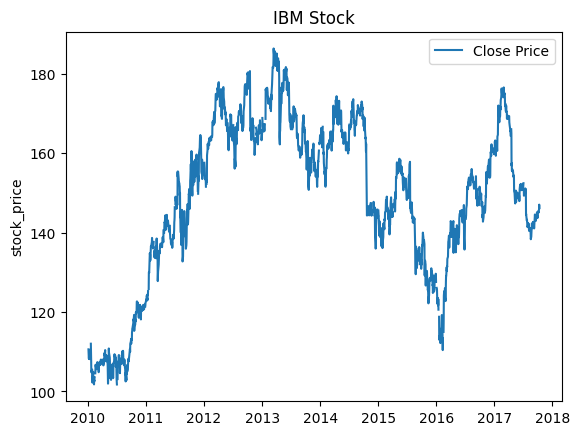

In [ ]:
# TODO 8
plt.plot(df_ibm['Close'], label='Close Price')
plt.title('IBM Stock')
plt.ylabel('stock_price')
plt.legend()
plt.show()

## Data Preprocessing

### TODO 9 (6 points)

For our lab purposes, let us perform analysis only on the column `Close` and discard the remaining.

1. Restructure the dataframe such that it contains only the column `Close`. Make sure that the index that we've set previously doesn't get changed. Store it into `df_ibm` itself.
2. Fill all the null values in the column using `fillna` function.
3. Standardize the column using `MinMaxScaler` with a feature range (-1, 1). Store it in a variable `scaler` and use it to transform the `Close` column values in the DataFrame `df_ibm` by fitting and transforming them into the scaled values

In [ ]:
# TODO 9.1
df_ibm = df_ibm[['Close']]

df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2010-01-04 to 2017-10-11
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1958 non-null   float64
dtypes: float64(1)
memory usage: 96.2 KB


In [ ]:
# TODO 9.2
df_ibm['Close'] = df_ibm['Close'].fillna(method='ffill')

# TODO 9.3
scaler = MinMaxScaler(feature_range=(-1, 1))
df_ibm['Close'] = scaler.fit_transform(df_ibm[['Close']])

df_ibm

<ipython-input-29-5bde5cf6069d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibm['Close'] = df_ibm['Close'].fillna(method='ffill')
<ipython-input-29-5bde5cf6069d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibm['Close'] = scaler.fit_transform(df_ibm[['Close']])


,Close
2010-01-04,-0.790830
2010-01-05,-0.822264
2010-01-06,-0.838809
2010-01-07,-0.847554
2010-01-08,-0.822264
...,...
2017-10-05,0.028835
2017-10-06,0.023162
2017-10-09,0.044434
2017-10-10,0.070433


## Data Splitting


### TODO 10 (6 points)

1. Set the size of the test set to 20% of the total number of rows present in `data`. Store it in `test_set_size`. Then, compute the size of the training set by subtracting the size of the test set from the total number of rows in `data`. Store it in `train_test_size`.
2. Set `look_back` to 60. This helps in creating batches of 60 sequences each.
3. Split the standardized dataset into `x_train`, `y_train`, `x_test`, `y_test` by passing the dataset and the value of `look_back` to `load_data` function.
4. Print the shapes of each of these subsets.

In [ ]:
data = df_ibm

test_set_size = int(len(data) * 0.2)
train_set_size = len(data) - test_set_size

def load_data(stock, look_back):
    data_raw = stock.values
    data = []

    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back):
        data.append(data_raw[index: index + look_back])

    data = np.array(data);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

# TODO 10.2 - 10.4
look_back = 60
x_train, y_train, x_test, y_test = load_data(data, look_back)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1623, 59, 1)
y_train shape: (1623, 1)
x_test shape: (345, 59, 1)
y_test shape: (345, 1)


Since the data is a time series data, we dont split the data into training and testing parts randomly. While training, the model requires the training data that has some sort of continuity. Hence, we donot perform shuffling on this data unlike the one we have done on sentimental analysis data. Also, since the main goal of time series data is to predict future actions based on past actions, we seperate the last part of data into testing and set the remaining top part of the data to training.

The below cell converts `x_train`, `y_train`, `x_test`, `y_test` from NumPy arrays to PyTorch Tensors that remain suitable to feed for our model.

In [ ]:
# Make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

## LSTM Model Creation

### TODO 11 (10 points)

1. Create an LSTM layer using `nn.LSTM` and pass the parameters `input_dim`, `hidden_dim`, `num_layers`, `output_dim`, and `Batch_first`. Set `batch_first` to True.  Store the whole layer in `lstm`.
2. Create a linear layer using `nn.Linear` and pass `hidden_dim` and `output_dim` to it. Store it in `fc`.
3. Call the LSTM class and pass `input_dim`, `hidden_dim`, `num_layers`, `output_dim`. Store the model in the variable `model`.
4. Set MSE Loss as loss function using `nn.MSELoss` and store it in `loss_fn`.
5. Set `optimizer` to `Adam` and pass the model parameters using `model.parameters()` and learning rate that is set to 0.01.

Hint: Initialize the variables in 1&2 with the help of `self`.

In [ ]:
import torch.optim as optim

input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1


class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):

        super(LSTM, self).__init__()

       # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # TODO 11.1 - 11.2
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        out = self.fc(out[:, -1, :])

        return out

# TODO 11.3 - 11.5
model = LSTM(input_dim, hidden_dim, num_layers, output_dim)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(-1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)

<ipython-input-57-9493a9b831f3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(-1)
<ipython-input-57-9493a9b831f3>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)


## Training and Testing

### TODO 12 (10 points)

In this stage, we now focus on training the model using the training data that we've prepared in TODO 10.

1. Set number of epochs to 100 in `num_epochs`.
2. Pass the training data `x_train` to `model` and store the predictions in `y_train_pred`.
3. Compute the loss function by passing `y_train_pred` and `y_train` to the loss function declared in `loss_fn` and store it in `loss`.
4. Zero out the gradient in `optimizer` using `zero_grad()` function.
5. Implement backward loss on `loss` using `backward()` function.
6. Update the parameters in optimizer using `step()` function.
7. Plot the training loss stored in `hist` and comment on it.

Note: This cell takes some time to compute execution.

In [ ]:
# TODO 12.1
num_epochs = 100

hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1

for t in range(num_epochs):

    # TODO 12.2: Forward pass
    y_train_pred = model(x_train)


    # TODO 12.3: Loss Function
    loss = loss_fn(y_train_pred, y_train)

    if (t+1) % 10 == 0 and t !=0:
        print("Epoch ", t+1, "MSE: ", loss.item())
    hist[t] = loss.item()

    # TODO 12.4: Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # TODO 12.5: Backward pass
    loss.backward()

    # TODO 12.6: Update parameters
    optimizer.step()


Epoch  10 MSE:  0.040519725531339645
Epoch  20 MSE:  0.0164091307669878
Epoch  30 MSE:  0.013361544348299503
Epoch  40 MSE:  0.009568815119564533
Epoch  50 MSE:  0.006280362140387297
Epoch  60 MSE:  0.004882153123617172
Epoch  70 MSE:  0.00440862076357007
Epoch  80 MSE:  0.004088068846613169
Epoch  90 MSE:  0.003889309009537101
Epoch  100 MSE:  0.003766012843698263


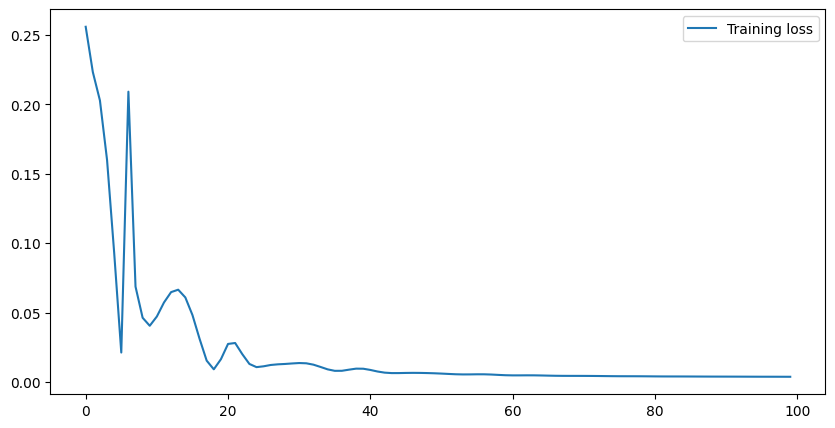

In [ ]:
# TODO 12.7: Plotting the Training loss
plt.figure(figsize=(10, 5))
plt.plot(hist, label='Training loss')
plt.legend()
plt.show()

`TODO 12.7`: Comment on the graph that you achieved.

`ANSWER:` There's a sharp decline in loss at the very beginning which means that the model quickly learned from the initial data. There is also a couple of early spikes which could mean that the model had some trouble getting patterns from the data. After 10 epochs the model declines signifigantly

In [ ]:
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(-1)

<ipython-input-38-8e725b855603>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(-1)


### TODO 13 (5 points)

After completion of training, we now focus on testing the performance of our model.

1. Make predictions from the model by passing `x_test` to `model` and store it in `y_test_pred`.
2. Note the we have scaled all the values in our target column `Close` using MinMaxScaler. For making predictions, lets revert back by using `inverse_transform` function. The first one for `y_train_pred` is done for you. Repeat the same with `y_train`, `y_test_pred`, and `y_test`.
3. Calculate the Root Mean Squared Error for training data by considering only the target column of `y_train` and `y_train_pred`.
4. Perform the previous step with testing data by considering `y_test` and `y_test_pred`.

In [ ]:
# TODO 13.1: Make predictions
y_test_pred = model(x_test)

# TODO 13.2: Invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# TODO 13.3 - 13.4: Calculate root mean squared error
trainScore = sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
testScore = sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.60 RMSE
Test Score: 1.98 RMSE


### TODO 14 (7 points)

Let us now visualize the results.
1. Plot a line graph to compare the original values `y_test` with the predicted values `y_test_pred`.
  * Set the colour red to the original data and blue for predicted data.
2. Set the corresponding dates in x-axis.
  * Hint: `df_ibm[len(df_ibm)-len(y_test):]` gives you the list of dates that we've considered for testing purposes.
3. Comment on the metrics and the graph that you achieved.

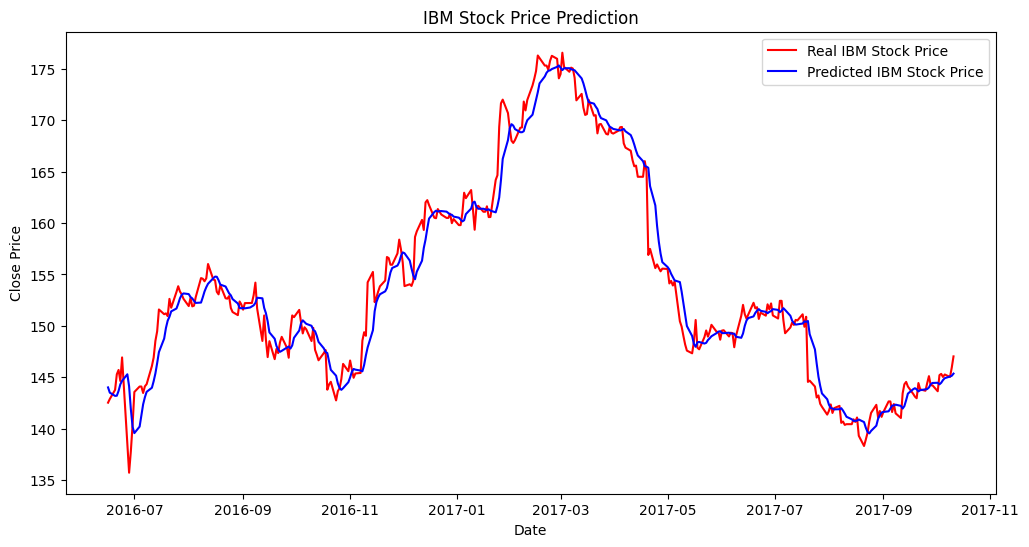

In [ ]:
# TODO 14.1 - 14.2
test_dates = df_ibm[len(df_ibm) - len(y_test):].index


plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, color='red', label='Real IBM Stock Price')
plt.plot(test_dates, y_test_pred, color='blue', label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

`TODO 14.3`: Comment on the graph that you achieved.

`ANSWER:` the predictied model follow the actual price very closly which means the general pattern in the stock's movement over time. Obviously the model is not one to one and there is a slight delay that real model hits its target a little bit earlier than predicted. Extreme Drops and Rises in the Close price are predicted but to the point of that extent


# Feedback (3 points)

Did you enjoy the lab?

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER:` N/A

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?

`ANSWER:` N/A

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER:` N/A